A little project really common in AI field: solving the AND
by doing backpropagation by hands (not using built in functions .grad) and gradient descent

Step 0, Error: 0.4908250570297241
Step 5000, Error: 0.087661974132061
Step 10000, Error: 0.026319989934563637
Step 15000, Error: 0.01087146531790495
Step 20000, Error: 0.0060142953880131245
Step 25000, Error: 0.003926970064640045
Step 30000, Error: 0.0028296299278736115
Step 35000, Error: 0.002172875450924039
Step 40000, Error: 0.0017434196779504418
Step 45000, Error: 0.0014442334650084376


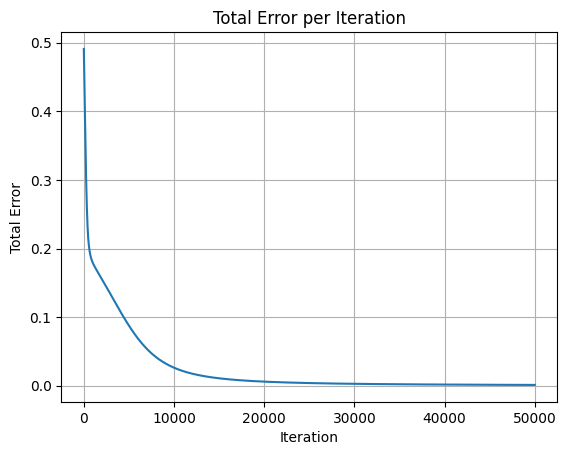

b3: -1.7118678092956543
b4: 1.6682435274124146
b5: -2.0262911319732666
w_13: 2.0315468311309814
w_14: 0.26819688081741333
w_23: 1.9268327951431274
w_24: -0.025878803804516792
w_35: 3.2850804328918457


In [16]:
import random
import torch
import matplotlib.pyplot as plt

# Constants
learning_rate = 0.01

# Input values (features)
x_1 = torch.tensor([1.0, 1.0, 0.0, 0.0], dtype=torch.float32)
x_2 = torch.tensor([1.0, 0.0, 1.0, 0.0], dtype=torch.float32)

# True labels
y = torch.tensor([1, 0, 0, 0], dtype=torch.float32)

# Initialize weights and biases
w_13, w_14, w_23, w_24, w_35, w_45 = [torch.zeros(2, dtype=torch.float32) for _ in range(6)]
b_3, b_4, b_5 = [torch.zeros(2, dtype=torch.float32) for _ in range(3)]

# Assign random initial values to weights and biases
for w in [w_13, w_14, w_23, w_24, w_35, w_45, b_3, b_4, b_5]:
    w[0] = random.random()

# Define activation function derivative
def relu_derivative(x):
    return torch.where(x >= 0, torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))

# Error tracking
erro_totais = []

# Training loop
for k in range(50000):
    # Initialize gradients
    grad_w_13, grad_w_14, grad_w_23, grad_w_24, grad_w_35, grad_w_45 = [torch.zeros(1, dtype=torch.float32) for _ in range(6)]
    grad_b3, grad_b4, grad_b5 = [torch.zeros(1, dtype=torch.float32) for _ in range(3)]

    # Initialize intermediate values
    z_3, z_4, z_5 = [torch.zeros(4, dtype=torch.float32) for _ in range(3)]
    a_3, a_4, a_5 = [torch.zeros(4, dtype=torch.float32) for _ in range(3)]

    # Forward pass
    for i in range(4):
        z_3[i] = w_13[0] * x_1[i] + w_23[0] * x_2[i] + b_3[0]
        a_3[i] = torch.relu(z_3[i])

        z_4[i] = w_14[0] * x_1[i] + w_24[0] * x_2[i] + b_4[0]
        a_4[i] = torch.relu(z_4[i])

        z_5[i] = a_3[i] * w_35[0] + a_4[i] * w_45[0] + b_5[0]
        a_5[i] = torch.sigmoid(z_5[i])

    # Backward pass
    dloss_da5 = torch.zeros(4, dtype=torch.float32)
    da5_dz5 = torch.zeros(4, dtype=torch.float32)
    dz5_da3 = torch.zeros(4, dtype=torch.float32)
    da3_dz3 = torch.zeros(4, dtype=torch.float32)

    dloss_dw13 = torch.zeros(4, dtype=torch.float32)
    dloss_dw23 = torch.zeros(4, dtype=torch.float32)
    dloss_db3 = torch.zeros(4, dtype=torch.float32)
    da4_dz4 = torch.zeros(4, dtype=torch.float32)
    dloss_dw24 = torch.zeros(4, dtype=torch.float32)
    dloss_dw14 = torch.zeros(4, dtype=torch.float32)
    dloss_db4 = torch.zeros(4, dtype=torch.float32)
    dloss_dw_35 = torch.zeros(4, dtype=torch.float32)
    dloss_dw_45 = torch.zeros(4, dtype=torch.float32)
    dloss_db5 = torch.zeros(4, dtype=torch.float32)

    # Calculate gradients
    for i in range(4):
        dloss_da5[i] = -1 * (y[i] - a_5[i]) / 4
        da5_dz5[i] = a_5[i] * (1 - a_5[i])
        dz5_da3[i] = w_35[0]
        da3_dz3[i] = relu_derivative(z_3[i])

        dloss_dw13[i] = dloss_da5[i] * da5_dz5[i] * dz5_da3[i] * da3_dz3[i] * x_1[i]
        dloss_dw23[i] = dloss_da5[i] * da5_dz5[i] * dz5_da3[i] * da3_dz3[i] * x_2[i]
        dloss_db3[i] = dloss_da5[i] * da5_dz5[i] * dz5_da3[i] * da3_dz3[i]

        da4_dz4[i] = relu_derivative(z_4[i])
        dloss_dw24[i] = dloss_da5[i] * da5_dz5[i] * w_45[0] * da4_dz4[i] * x_2[i]
        dloss_dw14[i] = dloss_da5[i] * da5_dz5[i] * w_45[0] * da4_dz4[i] * x_1[i]
        dloss_db4[i] = dloss_da5[i] * da5_dz5[i] * w_45[0] * da4_dz4[i]

        dloss_dw_35[i] = dloss_da5[i] * da5_dz5[i] * a_3[i]
        dloss_dw_45[i] = dloss_da5[i] * da5_dz5[i] * a_4[i]
        dloss_db5[i] = dloss_da5[i] * da5_dz5[i]

    grad_w_13 = dloss_dw13.sum()
    grad_w_23 = dloss_dw23.sum()
    grad_b3 = dloss_db3.sum()
    grad_w_24 = dloss_dw24.sum()
    grad_w_14 = dloss_dw14.sum()
    grad_b4 = dloss_db4.sum()
    grad_w_35 = dloss_dw_35.sum()
    grad_w_45 = dloss_dw_45.sum()
    grad_b5 = dloss_db5.sum()

    # Update weights and biases
    for w, grad in zip([w_13, w_14, w_23, w_24, w_35, w_45], [grad_w_13, grad_w_14, grad_w_23, grad_w_24, grad_w_35, grad_w_45]):
        w[1] = w[0] - grad * learning_rate

    for b, grad in zip([b_3, b_4, b_5], [grad_b3, grad_b4, grad_b5]):
        b[1] = b[0] - grad * learning_rate

    for w in [w_13, w_14, w_23, w_24, w_35, w_45]:
        w[0] = w[1]

    for b in [b_3, b_4, b_5]:
        b[0] = b[1]

    # Calculate and track error
    erro_total = torch.mean((y - a_5) ** 2)
    erro_totais.append(erro_total.item())
    if k % 5000 == 0:  # Print error every 5000 steps
        print(f"Step {k}, Error: {erro_total.item()}")

# Plot error over iterations
plt.figure()
plt.plot(erro_totais)
plt.xlabel("Iteration")
plt.ylabel("Total Error")
plt.title("Total Error per Iteration")
plt.grid(True)
plt.show()

# Print final weights and biases
print(f'b3: {b_3[0].item()}')
print(f'b4: {b_4[0].item()}')
print(f'b5: {b_5[0].item()}')
print(f'w_13: {w_13[0].item()}')
print(f'w_14: {w_14[0].item()}')
print(f'w_23: {w_23[0].item()}')
print(f'w_24: {w_24[0].item()}')
print(f'w_35: {w_35[0].item()}')